In [28]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.dates as mdates
from matplotlib.finance import candlestick_ohlc
%matplotlib inline
style.use('ggplot')

/Users/hushenglang/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# load the Amazon stock price data
df = pd.read_csv("data/AMZN.csv", parse_dates=True, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-06-21 to 2017-06-19
Data columns (total 6 columns):
Open         1762 non-null float64
High         1762 non-null float64
Low          1762 non-null float64
Close        1762 non-null float64
Adj Close    1762 non-null float64
Volume       1762 non-null int64
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


### Add column 100 moving average

The 100-day moving average is a popular technical indicator which investors use to analyze price trends. It is simply a security's average closing price over the last 100 days.

In [3]:
# calculate the 100 moving average
df["100ma"] = df["Adj Close"].rolling(window=100, min_periods=0).mean()

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2017-06-13,977.989990,984.500000,966.099976,980.789978,980.789978,4580000,894.241602
2017-06-14,988.590027,990.340027,966.710022,976.469971,976.469971,3974900,895.923002
2017-06-15,958.700012,965.729980,950.859985,964.169983,964.169983,5373900,897.385901
2017-06-16,996.000000,999.750000,982.000000,987.710022,987.710022,11472700,899.038602
2017-06-19,1017.000000,1017.000000,989.900024,995.169983,995.169983,5006900,900.625101


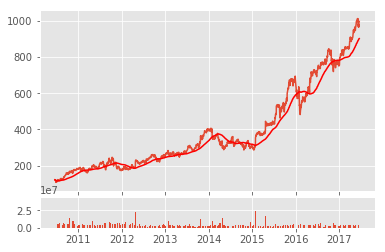

In [5]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'], color="red")
ax2.bar(df.index, df['Volume'])

plt.show()


### OHLC

Pandas resample API: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

ohlc is for candlestick data

In [16]:
df_ohlc = df["Adj Close"].resample("10D").ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [17]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-21,122.550003,122.550003,108.610001,109.260002
2010-07-01,110.959999,117.260002,109.139999,117.260002
2010-07-11,119.510002,123.650002,118.489998,120.099998
2010-07-21,117.430000,120.070000,116.860001,117.889999
2010-07-31,120.070000,128.830002,120.070000,128.830002


In [21]:
df_ohlc = df_ohlc.reset_index()

In [24]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [25]:
df_ohlc.head()

,Date,open,high,low,close
0,733944.0,122.550003,122.550003,108.610001,109.260002
1,733954.0,110.959999,117.260002,109.139999,117.260002
2,733964.0,119.510002,123.650002,118.489998,120.099998
3,733974.0,117.430000,120.070000,116.860001,117.889999
4,733984.0,120.070000,128.830002,120.070000,128.830002


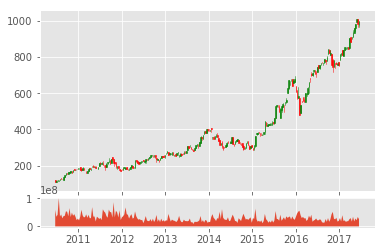

In [29]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()